### **1️⃣ DATA LOADING & PREPROCESSING**

In [4]:
import numpy as np
import pandas as pd
import os
import cv2
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
# Define dataset path "E:\Dataset\leapGestRecog\00"
folders_names = [f'E:/Dataset/leapGestRecog/0{i}' for i in range(10)]
files_names = ['01_palm', '02_l', '03_fist', '04_fist_moved', '05_thumb']

In [11]:
# Load dataset
def create_training_data():
    training_data = []
    for folder in folders_names:
        Class_num = int(folder[-1])  # Extract class number
        for file in files_names:
            path = os.path.join(folder, file)
            for img in tqdm(os.listdir(path)):
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                img_array = cv2.resize(img_array, (64, 64))  # Resize to (64,64) for CNN
                training_data.append([img_array, Class_num])
    return training_data

training_data = create_training_data()
random.shuffle(training_data)

100%|██████████| 200/200 [00:00<00:00, 338.52it/s]


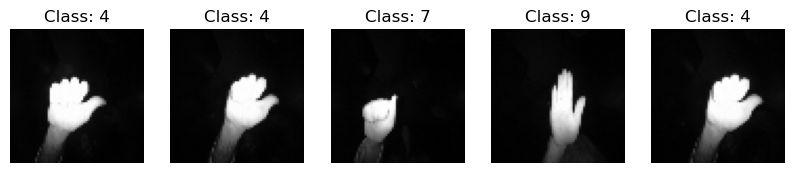

In [13]:
# Display first 5 images with labels
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(training_data[i][0], cmap='gray')
    plt.title(f"Class: {training_data[i][1]}")
    plt.axis('off')

plt.show()


In [15]:
# Prepare X and y
X = np.array([feature for feature, label in training_data]).reshape(-1, 64, 64, 1)  # Reshape for CNN
X = X / 255.0  # Normalize

y = np.array([label for _, label in training_data])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Train shape: (8000, 64, 64, 1), Test shape: (2000, 64, 64, 1)
